In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("hospital_readmissions.csv")
df.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')

In [1]:
# Create a minimal clean version of requirements

# required_libs = [
#     "pandas",
#     "numpy",
#     "matplotlib",
#     "seaborn",
#     "scikit-learn",
#     "shap"
# ]

# with open("requirements.txt", "w") as f:
#     for lib in required_libs:
#         f.write(f"{lib}\n")


In [2]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [3]:
df.tail()


,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,yes
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,yes
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no
24999,[50-60),10,37,1,24,0,0,0,Missing,Other,Diabetes,Circulatory,no,no,no,no,yes


In [4]:
df.shape #(rows,columns)

(25000, 17)

In [6]:
df.dtypes

# "hello", 123-->1 single object or multiple objects-->pandas
# "hi" as a single value-->string


age                  object
time_in_hospital      int64
n_lab_procedures      int64
n_procedures          int64
n_medications         int64
n_outpatient          int64
n_inpatient           int64
n_emergency           int64
medical_specialty    object
diag_1               object
diag_2               object
diag_3               object
glucose_test         object
A1Ctest              object
change               object
diabetes_med         object
readmitted           object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [8]:
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [9]:
df.isnull().sum() #sum of missing values

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

In [10]:
df.isna().mean()*100 #number of mean values in percentage

age                  0.0
time_in_hospital     0.0
n_lab_procedures     0.0
n_procedures         0.0
n_medications        0.0
n_outpatient         0.0
n_inpatient          0.0
n_emergency          0.0
medical_specialty    0.0
diag_1               0.0
diag_2               0.0
diag_3               0.0
glucose_test         0.0
A1Ctest              0.0
change               0.0
diabetes_med         0.0
readmitted           0.0
dtype: float64

In [11]:
# df['outpatient'].fillna(df['outpatient'].median(), inplace=True)
# use fillna() in missing values not for zero in numeric columns

# Impute numeric columns with median------>df['age'].fillna(df['age'].median(), inplace=True)

# Impute categorical columns with mode----->df['gender'].fillna(df['gender'].mode()[0], inplace=True)



##### Most ML models (e.g., scikit-learn classifiers) cannot handle NaN values directly. If you don’t fill them:
- model will throw an error, dataset can’t be processed completely

| **Strategy**                   | **When to Use**                                      | **Example**                               | **Code**                                                                                                                                           |
| ------------------------------ | ---------------------------------------------------- | ----------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Mean** (average)             | Use when numbers are balanced and no extreme values  | Test scores: `80, 85, NaN, 90`            | \`\`\`python<br>import pandas as pd<br>df = pd.DataFrame({'score': \[80, 85, None, 90]})<br>df\['score'].fillna(df\['score'].mean(), inplace=True) |
| **Median** (middle value)      | Use when data has extreme high/low values (outliers) | Hospital days: `2, 3, 3, NaN, 30`         | \`\`\`python<br>df = pd.DataFrame({'days': \[2, 3, 3, None, 30]})<br>df\['days'].fillna(df\['days'].median(), inplace=True)                        |
| **Mode** (most frequent value) | Use for text/categorical data                        | Gender: `'Male', 'Female', NaN, 'Female'` | \`\`\`python<br>df = pd.DataFrame({'gender': \['Male', 'Female', None, 'Female']})<br>df\['gender'].fillna(df\['gender'].mode()\[0], inplace=True)<br> ['Female','Male'] it would be Female-->mode()[0]|



In [ ]:
df.apply(lambda col: col.astype(str).str.lower().eq("missing").sum())


,0
age,0
time_in_hospital,0
n_lab_procedures,0
n_procedures,0
n_medications,0
n_outpatient,0
n_inpatient,0
n_emergency,0
medical_specialty,12382
diag_1,4


In [14]:
print(df.columns.tolist())
df.columns = df.columns.str.strip()  # Removes leading/trailing spaces
#df.drop(columns=['medical_specialty'], inplace=True)
# drop missing values of the column in the cell
# removedcolumn on rerun error occured

['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med', 'readmitted']


###### when drop is required:
1. when missing values> 50% in rows
2. not related to data/targets

In [ ]:
df[['diag_1', 'diag_2', 'diag_3']] = df[['diag_1', 'diag_2', 'diag_3']].replace("Missing", "Other")
df.head()
# to use fillna() there are no null values so i made use of .replace()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [12]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numeric_cols = df.select_dtypes(include=['int64']).columns.tolist()

print("Categorical:", categorical_cols)
print("Numeric:", numeric_cols)



Categorical: ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med', 'readmitted']
Numeric: ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']


In [13]:
df[categorical_cols].nunique() # no.of unique values

age                  6
medical_specialty    7
diag_1               8
diag_2               8
diag_3               8
glucose_test         3
A1Ctest              3
change               2
diabetes_med         2
readmitted           2
dtype: int64

In [ ]:
a=df['readmitted'].value_counts()
a

,count
readmitted,
no,13246
yes,11754


In [ ]:
b=df['readmitted'].value_counts(normalize=True)*100
b

,proportion
readmitted,
no,52.984
yes,47.016


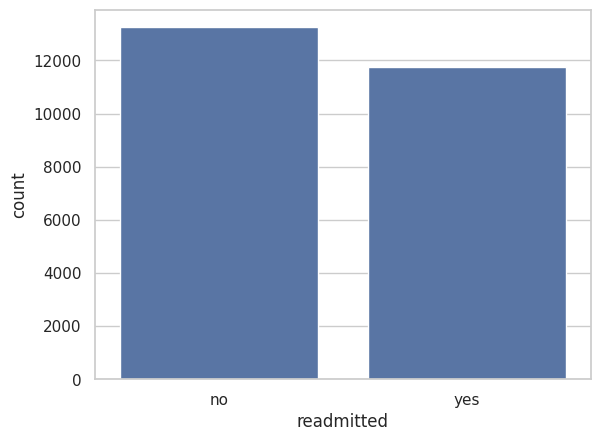

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,x="readmitted")
plt.show()
plt.savefig("readmitted.png")

In [ ]:
df[df.duplicated()].sum()


,0
age,0
time_in_hospital,0
n_lab_procedures,0
n_procedures,0
n_medications,0
n_outpatient,0
n_inpatient,0
n_emergency,0
medical_specialty,0
diag_1,0


Duplicates are not dropped for instance diag_1,diag_2,diag_3 has diabetes,circulatory,respiratory are the values observed repetatively.


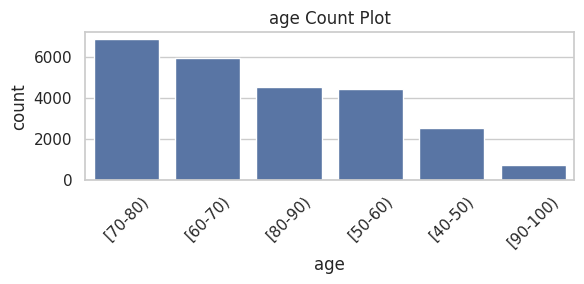

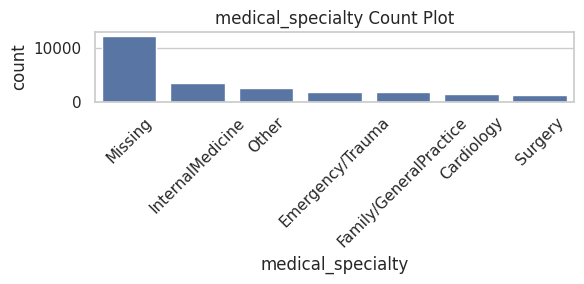

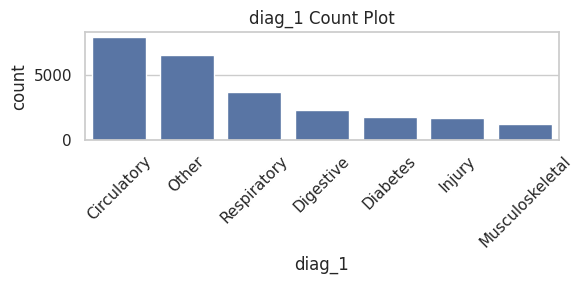

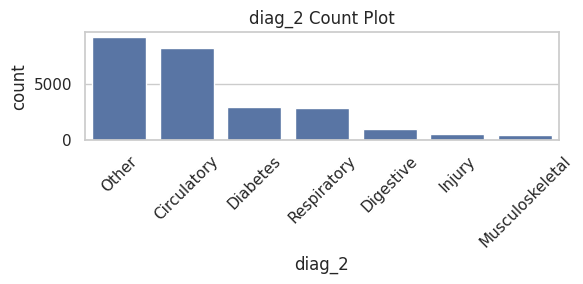

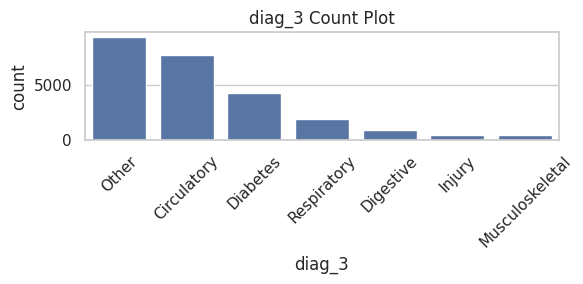

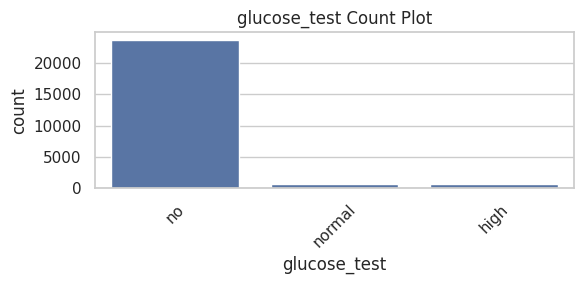

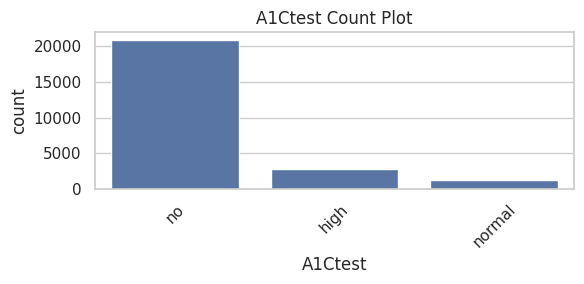

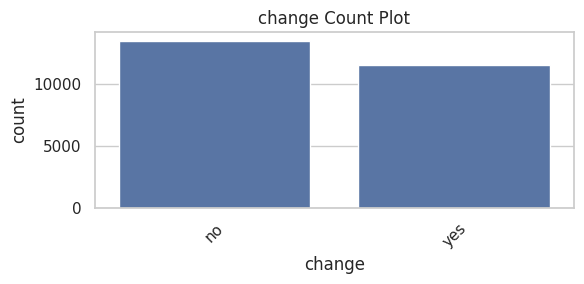

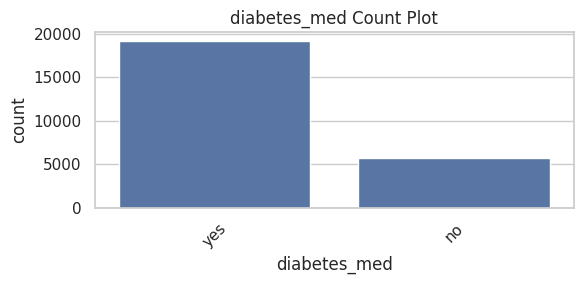

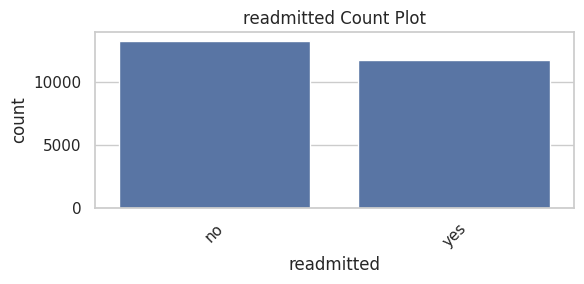

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
    plt.xticks(rotation=45)
    plt.title(f'{col} Count Plot')
    plt.tight_layout()
    plt.show()



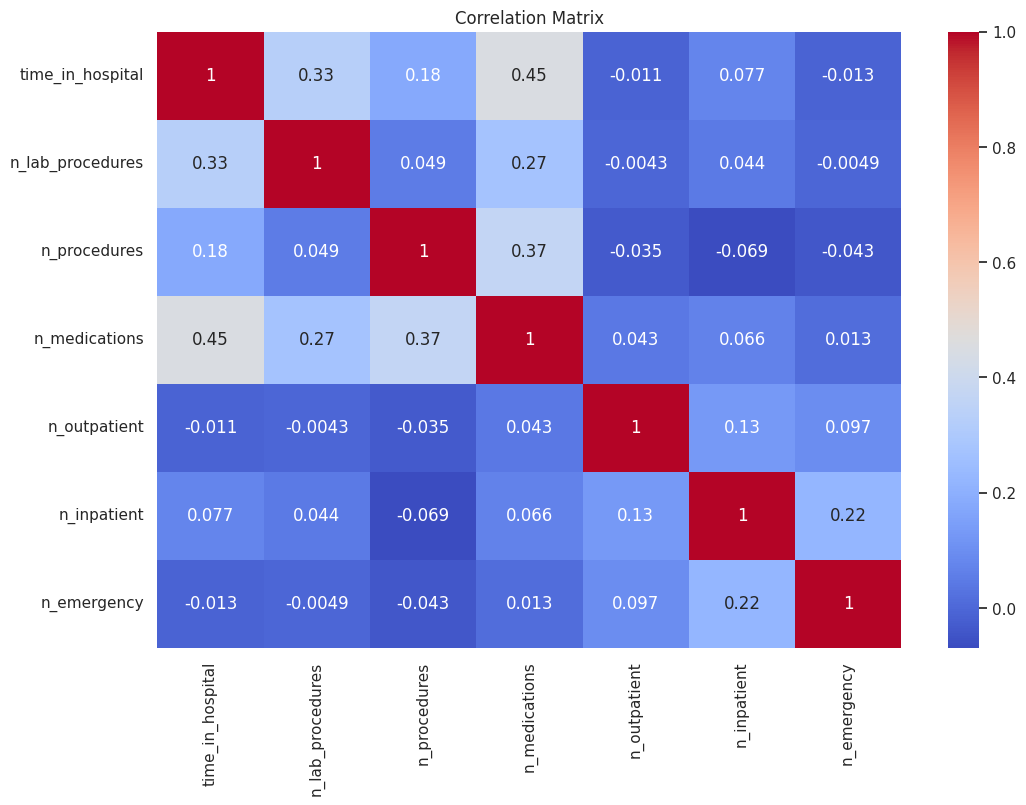

<Figure size 640x480 with 0 Axes>

In [ ]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
plt.savefig("correlation.png")

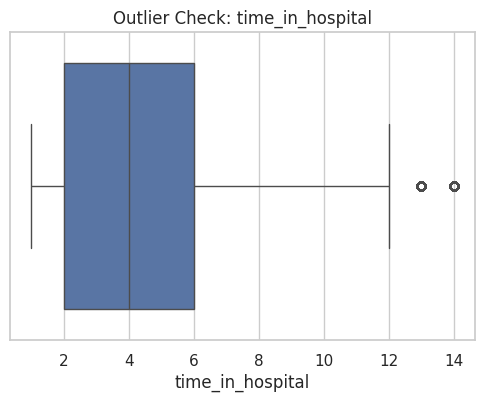

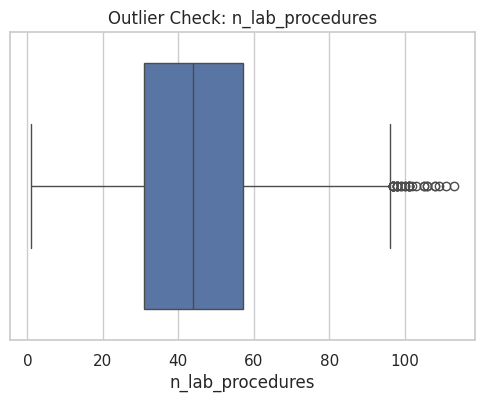

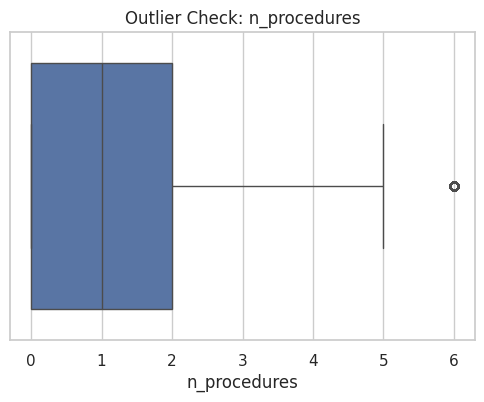

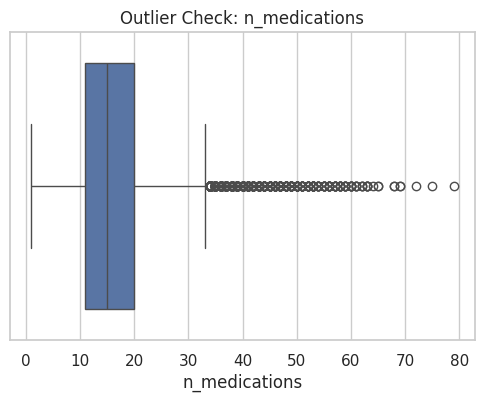

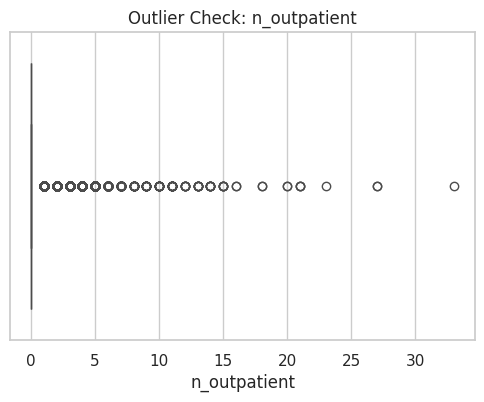

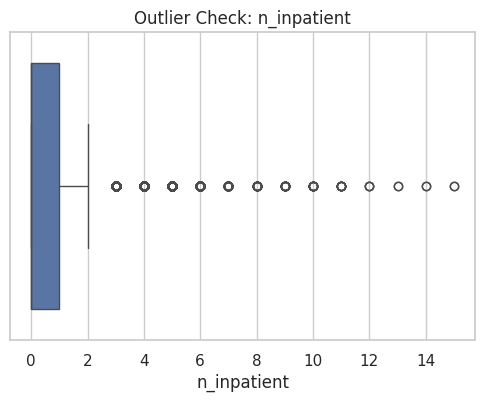

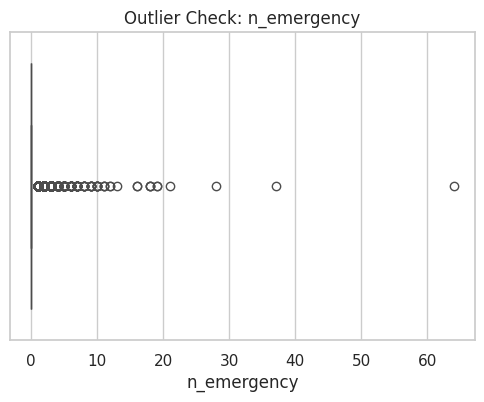

In [ ]:
# Boxplot for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Outlier Check: {col}')
    plt.show()


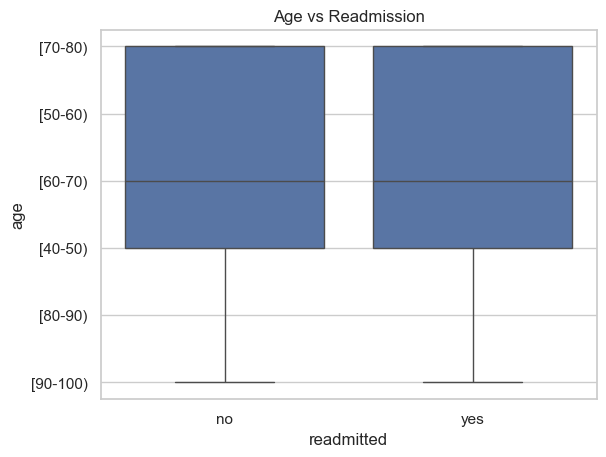

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
sns.boxplot(x="readmitted", y="age", data=df)
plt.title("Age vs Readmission")
plt.show()


In [16]:
df["readmitted"].head()


0     no
1     no
2    yes
3    yes
4     no
Name: readmitted, dtype: object

In [23]:

df_clean = df.copy()

# Convert 'readmitted' into binary: 'yes' if readmitted within 30 days, else 'no'
df_clean['readmitted_binary'] = df_clean['readmitted'].apply(lambda x: 1 if x == 'yes' else 0)

# Create a new feature: total prior visits
df_clean['prior_visits_total'] = df_clean['n_outpatient'] + df_clean['n_inpatient'] + df_clean['n_emergency']

# Create binary feature: has_multiple_diagnoses
def count_meaningful_diags(row):
    return sum(diag not in ['Other', 'Missing'] for diag in row)

df_clean['has_multiple_diagnoses'] = df_clean[['diag_1', 'diag_2', 'diag_3']].apply(count_meaningful_diags, axis=1)


# Review changes
df_clean[['readmitted', 'readmitted_binary', 'prior_visits_total', 'has_multiple_diagnoses']].head()


,readmitted,readmitted_binary,prior_visits_total,has_multiple_diagnoses
0,no,0,2,2
1,no,0,0,0
2,yes,1,0,3
3,yes,1,1,2
4,no,0,0,2


In [24]:
df_clean

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted,readmitted_binary,prior_visits_total,has_multiple_diagnoses
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no,0,2,2
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no,0,0,0
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes,1,0,3
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes,1,1,2
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,yes,1,0,2
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes,1,0,2
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,yes,1,1,0
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no,0,0,2


In [26]:
# Step 1: Ordinal Encoding for 'age'
age_order = {
    '[0-10)': 0, '[10-20)': 1, '[20-30)': 2, '[30-40)': 3,
    '[40-50)': 4, '[50-60)': 5, '[60-70)': 6, '[70-80)': 7,
    '[80-90)': 8, '[90-100)': 9
}
df_clean['age_encoded'] = df_clean['age'].map(age_order)
df_clean['age_encoded']

0        7
1        7
2        5
3        7
4        6
        ..
24995    8
24996    8
24997    7
24998    7
24999    5
Name: age_encoded, Length: 25000, dtype: int64

In [29]:
df_clean["medical_specialty"].value_counts()

medical_specialty
Missing                   12382
InternalMedicine           3565
Other                      2664
Emergency/Trauma           1885
Family/GeneralPractice     1882
Cardiology                 1409
Surgery                    1213
Name: count, dtype: int64

In [30]:
# Replacing 'Missing' with 'Unknown' for clarity 
df_clean['medical_specialty'] = df_clean['medical_specialty'].replace('Missing', 'Unknown')

# Apply Label Encoding to the 'medical_specialty' column
from sklearn.preprocessing import LabelEncoder

le_specialty = LabelEncoder()
df_clean['medical_specialty_encoded'] = le_specialty.fit_transform(df_clean['medical_specialty'])

# Show mapping of encoded values
medical_specialty_mapping = dict(zip(le_specialty.classes_, le_specialty.transform(le_specialty.classes_)))
medical_specialty_mapping


{'Cardiology': 0,
 'Emergency/Trauma': 1,
 'Family/GeneralPractice': 2,
 'InternalMedicine': 3,
 'Other': 4,
 'Surgery': 5,
 'Unknown': 6}

1. made use of ordinal Encoding for Ages
2. made use of Label Encoding for medical_specialty

| Specialty                 | Encoded Value |
| ------------------------- | ------------- |
| Cardiology                | 0             |
| Emergency/Trauma          | 1             |
| Family/GeneralPractice    | 2             |
| InternalMedicine          | 3             |
| Other                     | 4             |
| Surgery                   | 5             |
| Unknown *(was "Missing")* | 6             |


In [31]:
df_clean["glucose_test"].value_counts()

glucose_test
no        23625
normal      689
high        686
Name: count, dtype: int64

In [33]:
glucose_map = {'no': 0, 'normal': 1, 'high': 2}
df_clean['glucose_test_encoded'] = df_clean['glucose_test'].map(glucose_map)
df_clean['glucose_test_encoded']

0        0
1        0
2        0
3        0
4        0
        ..
24995    0
24996    0
24997    1
24998    0
24999    0
Name: glucose_test_encoded, Length: 25000, dtype: int64

#### Label Encoder for glucose_test

| Patient | glucose\_test | Meaning                      |
| ------- | ------------- | ---------------------------- |
| 0       | `no`          | No test done                 |
| 1       | `normal`      | Test done → glucose okay     |
| 2       | `high`        | Test done → glucose elevated |


In [34]:
df_clean["A1Ctest"].value_counts()

A1Ctest
no        20938
high       2827
normal     1235
Name: count, dtype: int64

In [35]:
A1Ctest_map = {'no': 0, 'normal': 1, 'high': 2}
df_clean['A1Ctest_encoded'] = df_clean['A1Ctest'].map(A1Ctest_map)
df_clean['A1Ctest_encoded']

0        0
1        0
2        0
3        0
4        0
        ..
24995    1
24996    2
24997    0
24998    0
24999    0
Name: A1Ctest_encoded, Length: 25000, dtype: int64

#### Label Encoder for A1Ctest

| Value          | Meaning                                                             |
| -------------- | ------------------------------------------------------------------- |
| **`'no'`**     | The **A1C test was not performed** during this visit                |
| **`'normal'`** | A1C test was done, result was **within normal range**               |
| **`'high'`**   | A1C test was done, result was **elevated**, indicating poor control |


In [36]:
df_clean["change"].value_counts()

change
no     13497
yes    11503
Name: count, dtype: int64

In [37]:
change_map = {'no': 0, 'yes':1}
df_clean['change_encoded'] = df_clean['change'].map(change_map)
df_clean['change_encoded']

0        0
1        0
2        1
3        1
4        0
        ..
24995    0
24996    1
24997    0
24998    1
24999    0
Name: change_encoded, Length: 25000, dtype: int64

##### A 'yes' often means instability or ineffective prior treatment

##### These patients may have a higher chance of readmission

| Value       | Meaning                                                    | Real-world Scenario                              |
| ----------- | ---------------------------------------------------------- | ------------------------------------------------ |
| **`'yes'`** | Diabetes medication **was changed** during hospitalization | Metformin dose increased from 500mg to 1000mg    |
| **`'no'`**  | Diabetes medication **was not changed** during the stay    | Patient continued same insulin dose and schedule |


In [38]:
df_clean["diabetes_med"].value_counts()

diabetes_med
yes    19228
no      5772
Name: count, dtype: int64

In [39]:
diabetes_med_map = {'no': 0, 'yes':1}
df_clean['diabetes_med_encoded'] = df_clean['diabetes_med'].map(diabetes_med_map)
df_clean['diabetes_med_encoded']

0        1
1        1
2        1
3        1
4        1
        ..
24995    0
24996    1
24997    0
24998    1
24999    0
Name: diabetes_med_encoded, Length: 25000, dtype: int64

##### This column indicates whether any diabetes medication was prescribed to the patient at all during the hospital stay.

| Value       | Meaning                                                                                       |
| ----------- | --------------------------------------------------------------------------------------------- |
| **`'yes'`** | The patient **was prescribed or continued** at least one diabetes medication during the visit |
| **`'no'`**  | The patient **did not receive** any diabetes medication during this hospital stay             |


Change vs diabetes_med

| Feature            | Meaning                                                           | Indicates                         |
| ------------------ | ----------------------------------------------------------------- | --------------------------------- |
| **`diabetes_med`** | Was **any** diabetes medication prescribed during this visit?     | Presence of diabetes diagnosis    |
| **`change`**       | Was the **treatment regimen adjusted** (dose change, med switch)? | Condition worsening or adjustment |

Example:
| Patient | diabetes\_med | change | Interpretation                           |
| ------- | ------------- | ------ | ---------------------------------------- |
| A       | `yes`         | `yes`  | On meds, and plan was adjusted (riskier) |
| B       | `yes`         | `no`   | On stable diabetes treatment             |
| C       | `no`          | `no`   | No meds, no need to change               |


| Type of Encoding     | Meaning                              | Example                                   |
| -------------------- | ------------------------------------ | ----------------------------------------- |
| **Binary Encoding**  | 2 categories → `0` or `1`            | `'yes'` = 1, `'no'` = 0                   |
| **Label Encoding**   | Multiple unordered labels → integers | `'red'` = 0, `'green'` = 1, `'blue'` = 2  |
| **Ordinal Encoding** | Categories with meaningful order     | `'low'` = 0, `'medium'` = 1, `'high'` = 2 |
